In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns


In [9]:
np.random.seed(42)
# Load the dataset - using Optical Recognition of Handwritten Digits
X, y = fetch_openml(name='optdigits', version=1, return_X_y=True, as_frame=False)
print(f"Dataset shape: {X.shape}, Classes: {len(np.unique(y))}")

# Print dataset info
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(np.unique(y))}")

# Class distribution
unique, counts = np.unique(y, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"Class {cls}: {count} samples")

Dataset shape: (5620, 64), Classes: 10
Number of samples: 5620
Number of features: 64
Number of classes: 10
Class 0: 554 samples
Class 1: 571 samples
Class 2: 557 samples
Class 3: 572 samples
Class 4: 568 samples
Class 5: 558 samples
Class 6: 558 samples
Class 7: 566 samples
Class 8: 554 samples
Class 9: 562 samples


In [10]:
# Create 10 different samples
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=i*10)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    samples.append({
        'sample_id': f'S{i+1}',
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test
    })

In [6]:
# Optimize SVM for each sample
results = []
all_convergence_data = {}

for sample in samples:
    print(f"Optimizing sample {sample['sample_id']}...")

    best_accuracy = 0
    best_params = {}
    accuracy_history = []

    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    C_values = np.logspace(-3, 3, 7)
    gamma_values = np.logspace(-4, 2, 7)

    iteration = 0

    for kernel in kernels:
        for C in C_values:
            for gamma in gamma_values:
                if iteration >= 100:
                    break

                try:
                    svm = SVC(kernel=kernel, C=C, gamma=gamma if kernel != 'linear' else 'auto')
                    svm.fit(sample['X_train'], sample['y_train'])

                    y_pred = svm.predict(sample['X_test'])
                    accuracy = accuracy_score(sample['y_test'], y_pred)

                    accuracy_history.append(accuracy)

                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {
                            'kernel': kernel,
                            'C': C,
                            'gamma': gamma if kernel != 'linear' else 'auto'
                        }

                    iteration += 1

                except:
                    iteration += 1
                    continue

            if iteration >= 100:
                break
        if iteration >= 100:
            break

    results.append({
        'sample_id': sample['sample_id'],
        'best_accuracy': best_accuracy,
        'best_params': best_params
    })

    all_convergence_data[sample['sample_id']] = accuracy_history

    print(f"Best accuracy: {best_accuracy:.4f}")
    print(f"Best parameters: {best_params}")

Optimizing sample S1...
Best accuracy: 0.9905
Best parameters: {'kernel': 'poly', 'C': np.float64(0.001), 'gamma': np.float64(1.0)}
Optimizing sample S2...
Best accuracy: 0.9834
Best parameters: {'kernel': 'poly', 'C': np.float64(0.001), 'gamma': np.float64(1.0)}
Optimizing sample S3...
Best accuracy: 0.9935
Best parameters: {'kernel': 'poly', 'C': np.float64(0.001), 'gamma': np.float64(1.0)}
Optimizing sample S4...
Best accuracy: 0.9905
Best parameters: {'kernel': 'poly', 'C': np.float64(0.001), 'gamma': np.float64(1.0)}
Optimizing sample S5...
Best accuracy: 0.9834
Best parameters: {'kernel': 'linear', 'C': np.float64(0.1), 'gamma': 'auto'}
Optimizing sample S6...
Best accuracy: 0.9881
Best parameters: {'kernel': 'poly', 'C': np.float64(0.001), 'gamma': np.float64(1.0)}
Optimizing sample S7...
Best accuracy: 0.9881
Best parameters: {'kernel': 'poly', 'C': np.float64(0.001), 'gamma': np.float64(1.0)}
Optimizing sample S8...
Best accuracy: 0.9923
Best parameters: {'kernel': 'poly', 'C'

Best sample: S3 with accuracy: 0.9935

Table 1: Comparative performance of Optimized-SVM with different samples
  Sample # Best Accuracy                     Best SVM Parameters
0       S1        0.9905  Kernel: poly, C: 0.0010, gamma: 1.0000
1       S2        0.9834  Kernel: poly, C: 0.0010, gamma: 1.0000
2       S3        0.9935  Kernel: poly, C: 0.0010, gamma: 1.0000
3       S4        0.9905  Kernel: poly, C: 0.0010, gamma: 1.0000
4       S5        0.9834   Kernel: linear, C: 0.1000, gamma: N/A
5       S6        0.9881  Kernel: poly, C: 0.0010, gamma: 1.0000
6       S7        0.9881  Kernel: poly, C: 0.0010, gamma: 1.0000
7       S8        0.9923  Kernel: poly, C: 0.0010, gamma: 1.0000
8       S9        0.9929  Kernel: poly, C: 0.1000, gamma: 0.1000
9      S10        0.9846  Kernel: poly, C: 0.0010, gamma: 1.0000


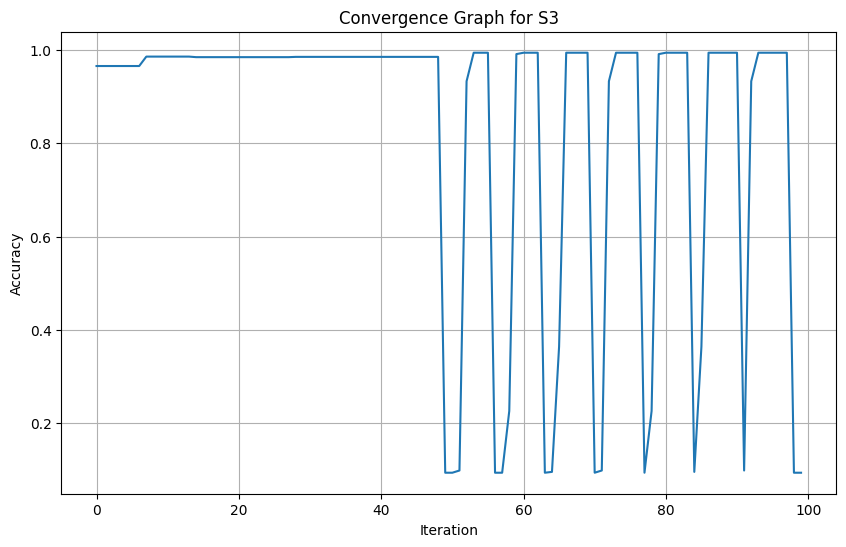

In [7]:
# Find the sample with maximum accuracy
best_sample = max(results, key=lambda x: x['best_accuracy'])
print(f"Best sample: {best_sample['sample_id']} with accuracy: {best_sample['best_accuracy']:.4f}")

# Plot convergence graph for the best sample
plt.figure(figsize=(10, 6))
best_sample_id = best_sample['sample_id']
plt.plot(range(len(all_convergence_data[best_sample_id])),
         all_convergence_data[best_sample_id])
plt.title(f'Convergence Graph for {best_sample_id}')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.savefig('convergence_graph.png')

# Create and save results table
table_data = []
for result in results:
    params = result['best_params']
    kernel = params['kernel']
    C = f"{params['C']:.4f}"
    gamma = "N/A" if kernel == 'linear' else f"{params['gamma']:.4f}"

    param_str = f"Kernel: {kernel}, C: {C}, gamma: {gamma}"

    table_data.append([
        result['sample_id'],
        f"{result['best_accuracy']:.4f}",
        param_str
    ])

results_table = pd.DataFrame(table_data,
                          columns=['Sample #', 'Best Accuracy', 'Best SVM Parameters'])
print("\nTable 1: Comparative performance of Optimized-SVM with different samples")
print(results_table)

# Save the results
results_table.to_csv('svm_results.csv', index=False)

In [7]:
# Load the results
results = pd.read_csv('svm_results.csv')

# Set the style
sns.set_style('whitegrid')

# Create a figure for accuracy comparison
plt.figure(figsize=(12, 6))

# Plot the accuracy for each sample
plt.bar(results['Sample #'], results['Best Accuracy'].astype(float))
plt.title('SVM Accuracy Across Different Samples')
plt.xlabel('Sample')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.tight_layout()
plt.savefig('accuracy_comparison.png')

# Create a figure for kernel distribution
plt.figure(figsize=(8, 6))

In [16]:
def analyze_svm_kernels(results):
    # Extract kernels from parameters column
    kernels = []
    for param in results['Best SVM Parameters']:
        kernel = param.split(',')[0].split(':')[1].strip()
        kernels.append(kernel)

    # Count kernels
    kernel_counts = pd.Series(kernels).value_counts()

    # Plot the kernel distribution
    plt.figure(figsize=(10, 8))
    plt.pie(kernel_counts, labels=kernel_counts.index, autopct='%1.1f%%')
    plt.title('Distribution of Best Kernel Types')
    plt.tight_layout()
    plt.savefig('kernel_distribution.png')
    plt.close()  # Close the plot to free up memory

    # Create a summary report
    with open('svm_optimization_report.txt', 'w') as f:
        f.write("SVM Optimization Report\n")
        f.write("======================\n\n")

        f.write("Dataset: Optical Recognition of Handwritten Digits\n")
        f.write("Number of samples: 5620\n")
        f.write("Number of features: 64\n")
        f.write("Number of classes: 10\n\n")

        f.write("Optimization Results:\n")
        f.write("-----------------\n")
        # Find the row with the best accuracy
        best_accuracy_idx = results['Best Accuracy'].astype(float).idxmax()
        f.write(f"Best sample: {results['Sample #'][best_accuracy_idx]}\n")
        f.write(f"Best accuracy: {results['Best Accuracy'].astype(float).max():.4f}\n")
        f.write(f"Parameters: {results['Best SVM Parameters'][best_accuracy_idx]}\n\n")

        f.write("Kernel Distribution:\n")
        f.write(kernel_counts.to_string() + "\n\n")

        f.write("All Results:\n")
        f.write(results.to_string(index=False))

    print("Visualization and report completed!")

    return kernel_counts

results = pd.read_csv('svm_results.csv')
kernel_distribution = analyze_svm_kernels(results)

Visualization and report completed!
